## Classify the Size_Categorie using SVM

In [270]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [271]:
#importing dataset using pandas
forest=pd.read_csv('forestfires.csv')

## Performing EDA

In [272]:
#displaying  first 5 records 
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [273]:
#displaying last 5 records
forest.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [274]:
#shape of dataset
forest.shape   

(517, 31)

Dataset has `517` rows and `31` columns

In [275]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<h4>The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.</h4>

In [276]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4>The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.</h4>

In [277]:
forest.ndim

2

In [278]:
forest.axes

[RangeIndex(start=0, stop=517, step=1),
 Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
        'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
        'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
        'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
        'monthoct', 'monthsep', 'size_category'],
       dtype='object')]

#### axes is a function of the matplotlib library that adds axes to the current graph and makes it as current axes.

<Figure size 1000x1500 with 0 Axes>

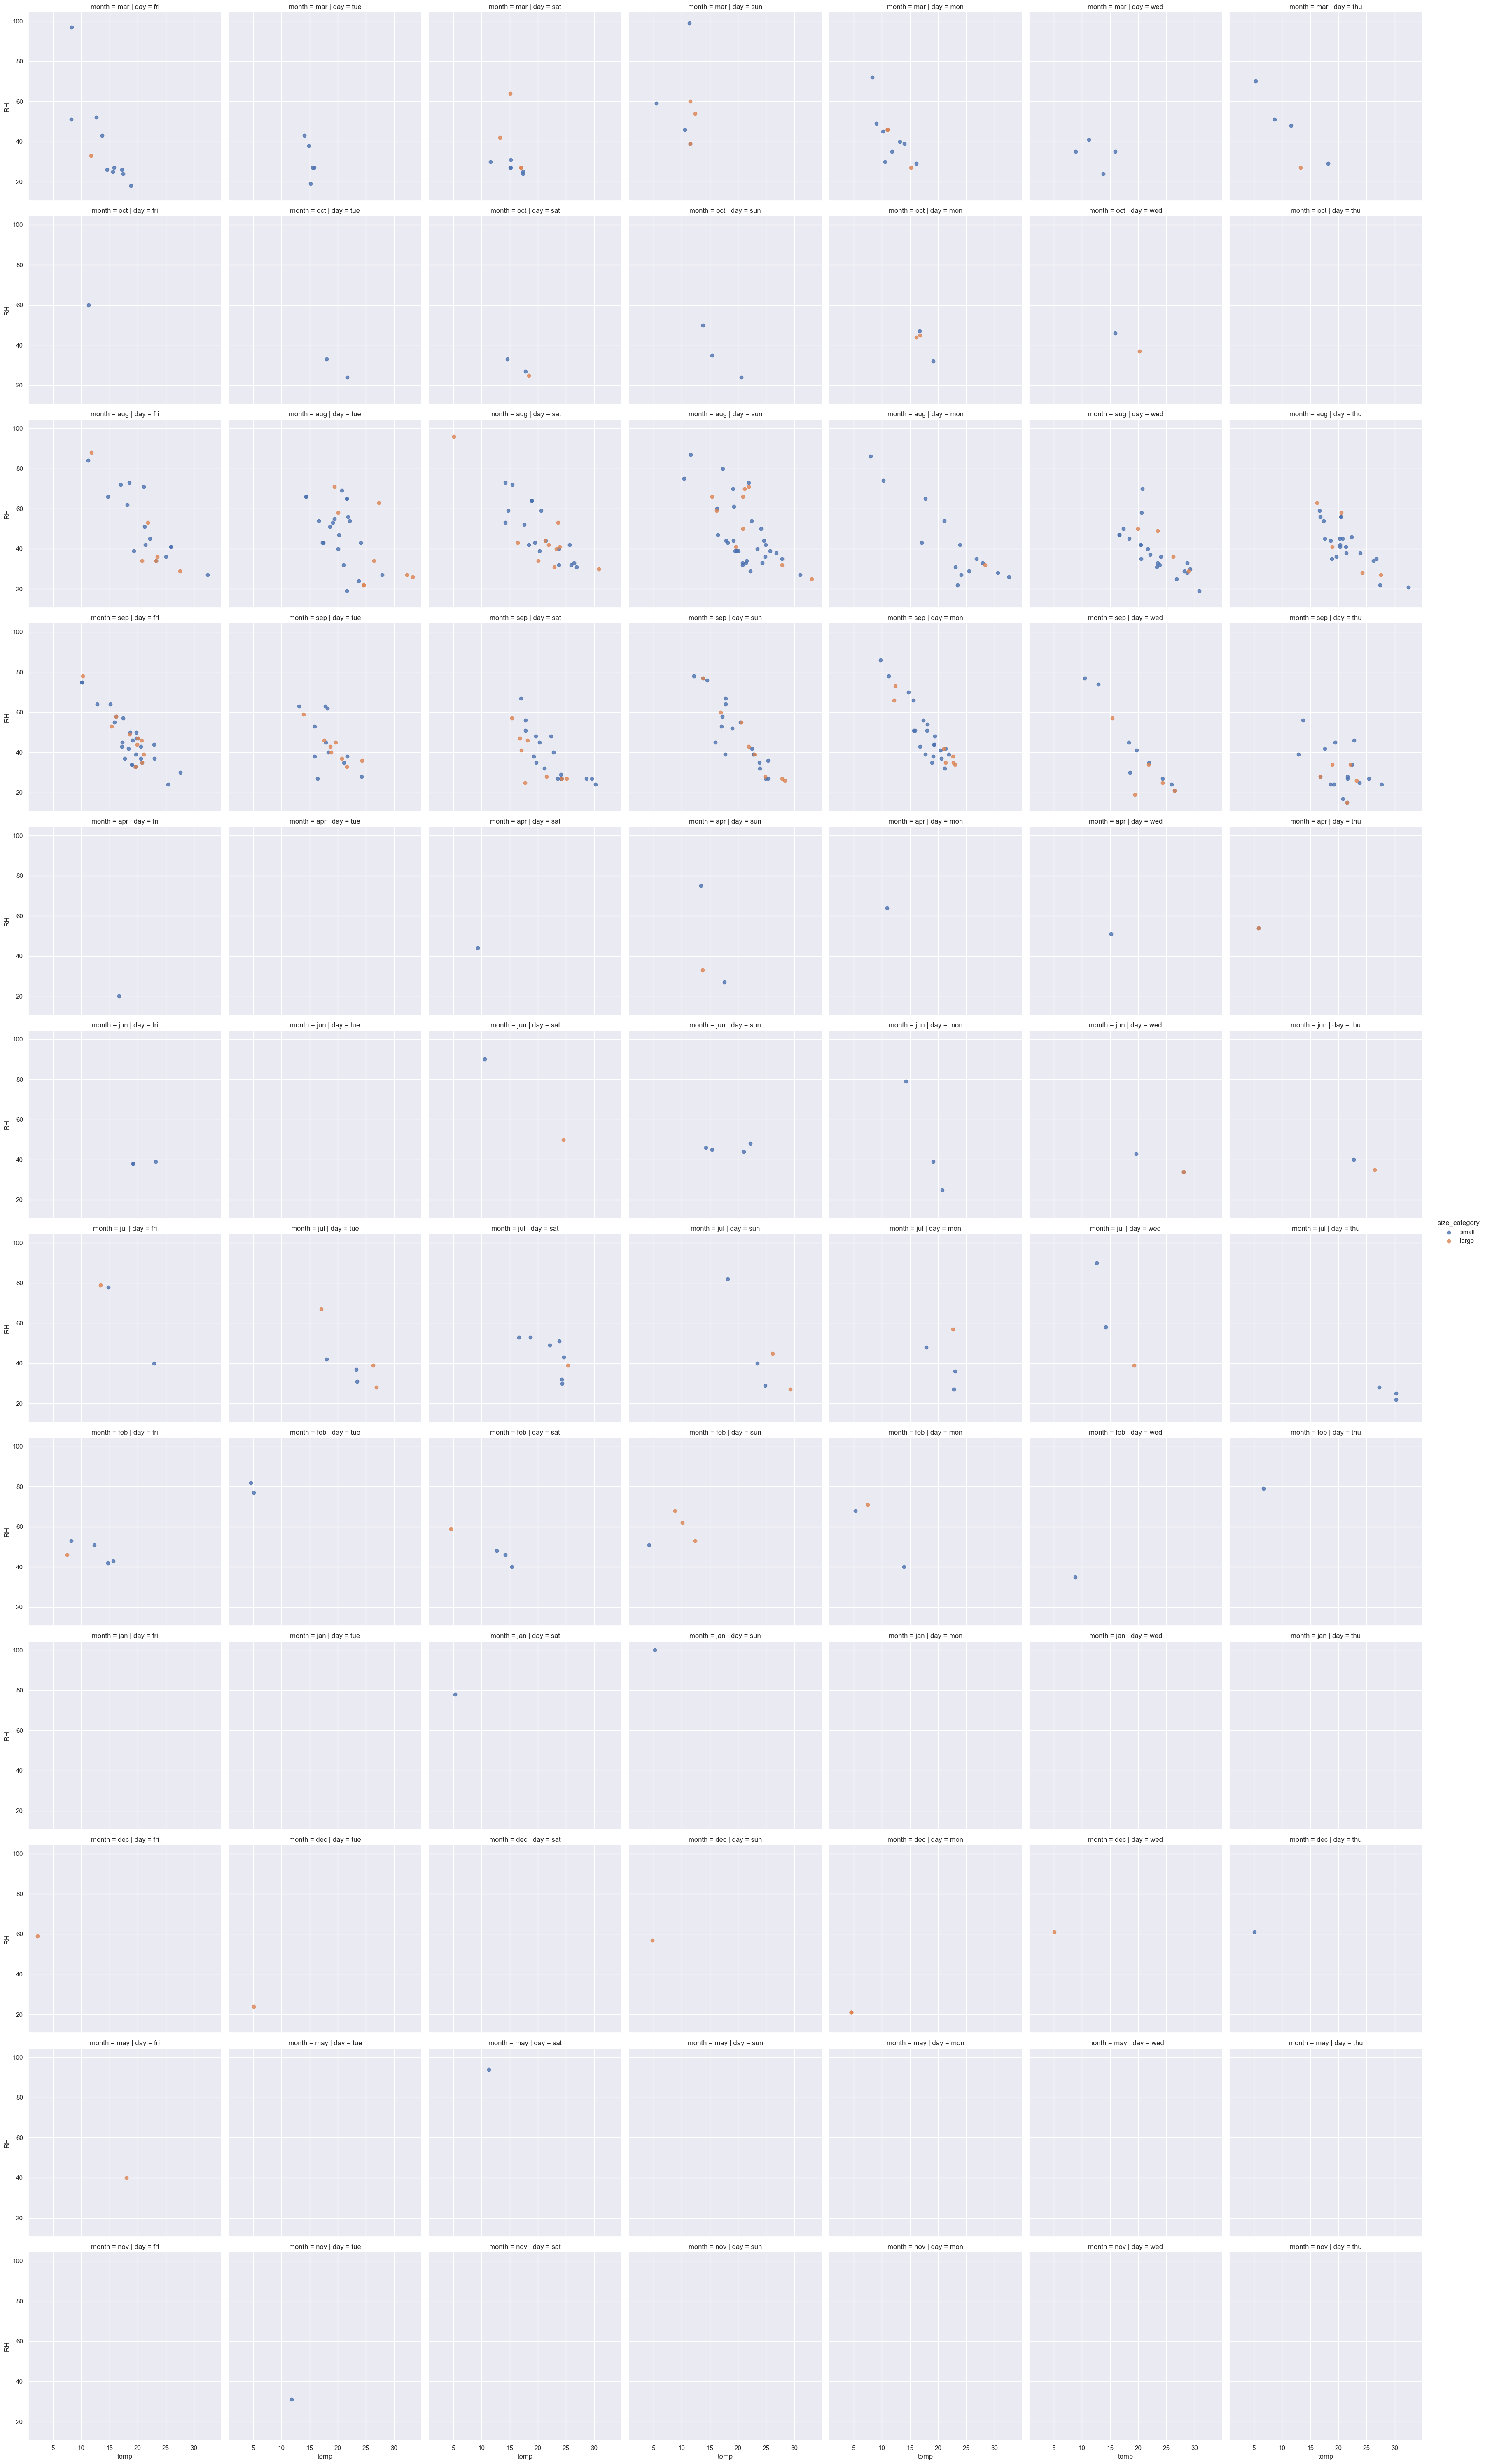

In [279]:
plt.figure(figsize=(10,15))
sns.lmplot(x='temp',y='RH',data=forest,hue='size_category' ,fit_reg=False,col='day',row='month')
plt.show()

<h4>Observations:</h4>
1. as the temperature increases the RH got decrease<br>
2. The numbers of fire got in the months of March, August and September<br>

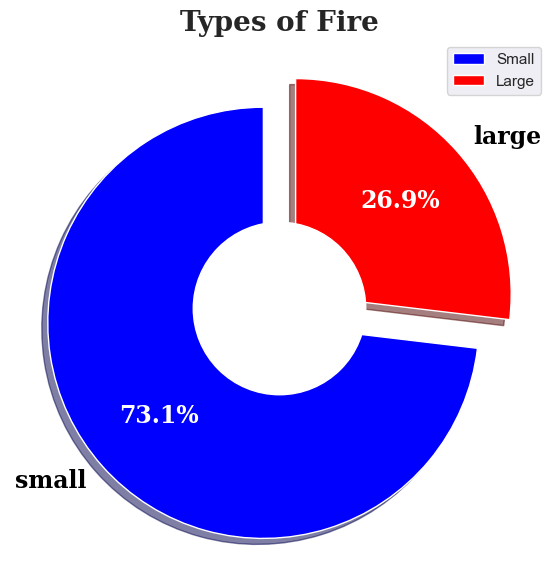

In [280]:
label_data=forest['size_category'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['blue','red'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Types of Fire',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Small','Large'],loc="upper right")
plt.show()

### Small fires took place more in numbers comapered to large fires

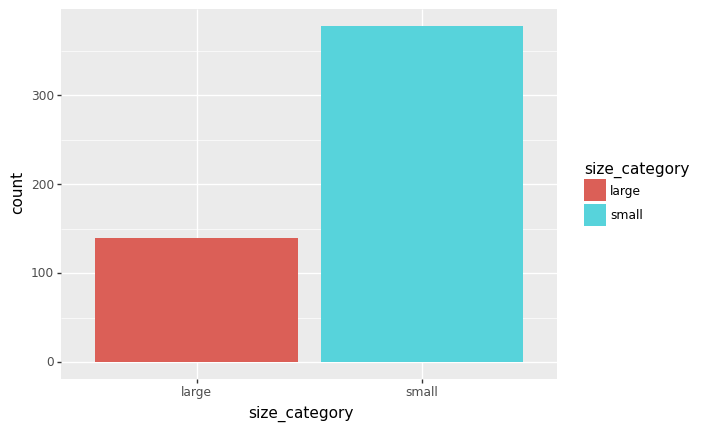

<ggplot: (158699194874)>

In [281]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(forest) + aes(x="size_category",fill='size_category') + geom_bar()

In [282]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

<h4> Here as we can see that the columns `month` and `day` has been converted into dummies so now we do not required it so we will drop them</h4>

In [283]:
forest.pop('month') #pop is used to remove coloumns
forest.pop('day')

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [284]:
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [285]:
forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

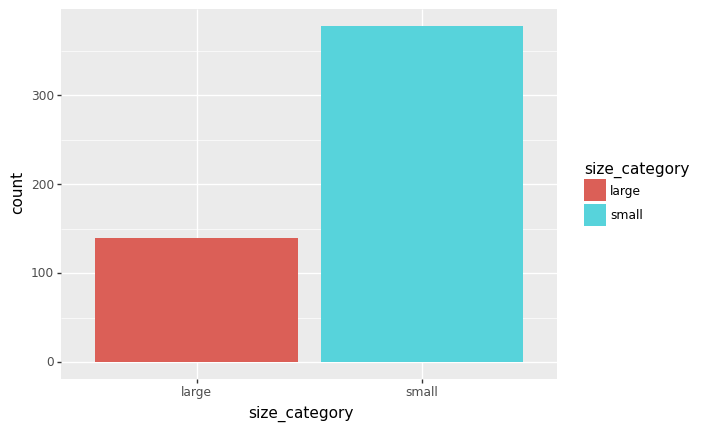

<ggplot: (158699197272)>

In [286]:
from plotnine import ggplot, aes, stat_bin, geom_bar
ggplot(forest) + aes(x="size_category",fill='size_category') + geom_bar()


#### From the above graph we can say thay most of the forest fires where small in quantity.

In [287]:
#Checking for missing data
NAs = pd.concat([forest.isnull().sum()], axis=1, keys=["Total NA"])
NAs[NAs.sum(axis=1) > 0]

,Total NA


#### There is no any missing value in the dataset 

In [288]:
#checking for duplication of data
forest[forest.duplicated()].shape

(8, 29)

In [289]:
#displying duplicate values
forest[forest.duplicated()]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
100,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
215,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,...,0,0,0,0,1,0,0,0,0,large
303,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,...,0,0,0,1,0,0,0,0,0,small
426,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
461,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
501,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,...,0,0,0,0,0,0,0,0,0,small
508,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,small


In [290]:
#droping the duplicate rows
forest=forest.drop_duplicates()

In [291]:
#checking for duplication of data
forest[forest.duplicated()].shape

(0, 29)

#### Now there is no any duplicate values

In [292]:
#checking unique values
forest.nunique()

FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [293]:
forest['size_category']=forest['size_category'].apply(lambda x: 1 if x=='large' else 0)

<h4> As SVM is classification model we can not work on stirng data as our dependent varible is in string so using lambda function we are converting it into categorical type</h4>

In [294]:
forest.tail()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
516,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0


In [295]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [296]:
features = ['monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul','monthjun', 
            'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']

In [297]:
list(enumerate(features))

[(0, 'monthapr'),
 (1, 'monthaug'),
 (2, 'monthdec'),
 (3, 'monthfeb'),
 (4, 'monthjan'),
 (5, 'monthjul'),
 (6, 'monthjun'),
 (7, 'monthmar'),
 (8, 'monthmay'),
 (9, 'monthnov'),
 (10, 'monthoct'),
 (11, 'monthsep')]

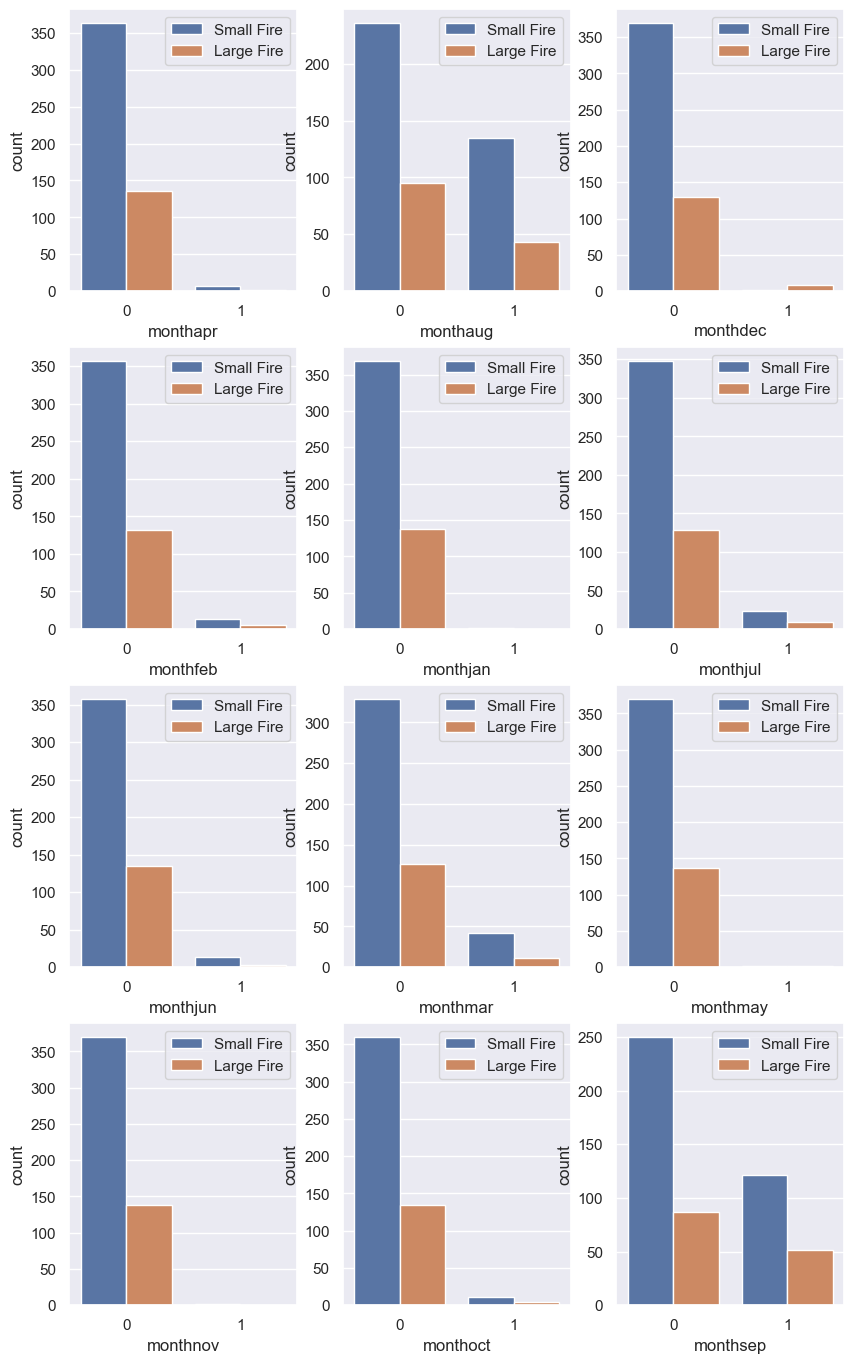

In [298]:
plt.figure(figsize=(10,30))
for i in enumerate(features):
    plt.subplot(7,3,i[0]+1)
    sns.countplot(i[1],hue='size_category',data=forest)
    plt.legend(["Small Fire","Large Fire"])
plt.show()    

<h4>Observations:</h4>
1. In the months of  February, March, April, May, June, July, August, September, October and December there was an large fire has taken place<br>
2. While in January and November small fires took place which where less harmful<br>
3. In August and September there is highly forest got small and large fires<br>
4. So,we can assume that in these this two months we should be well prepared with fire extinguisher equipments

In [299]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917,0.271120
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466,0.444975
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


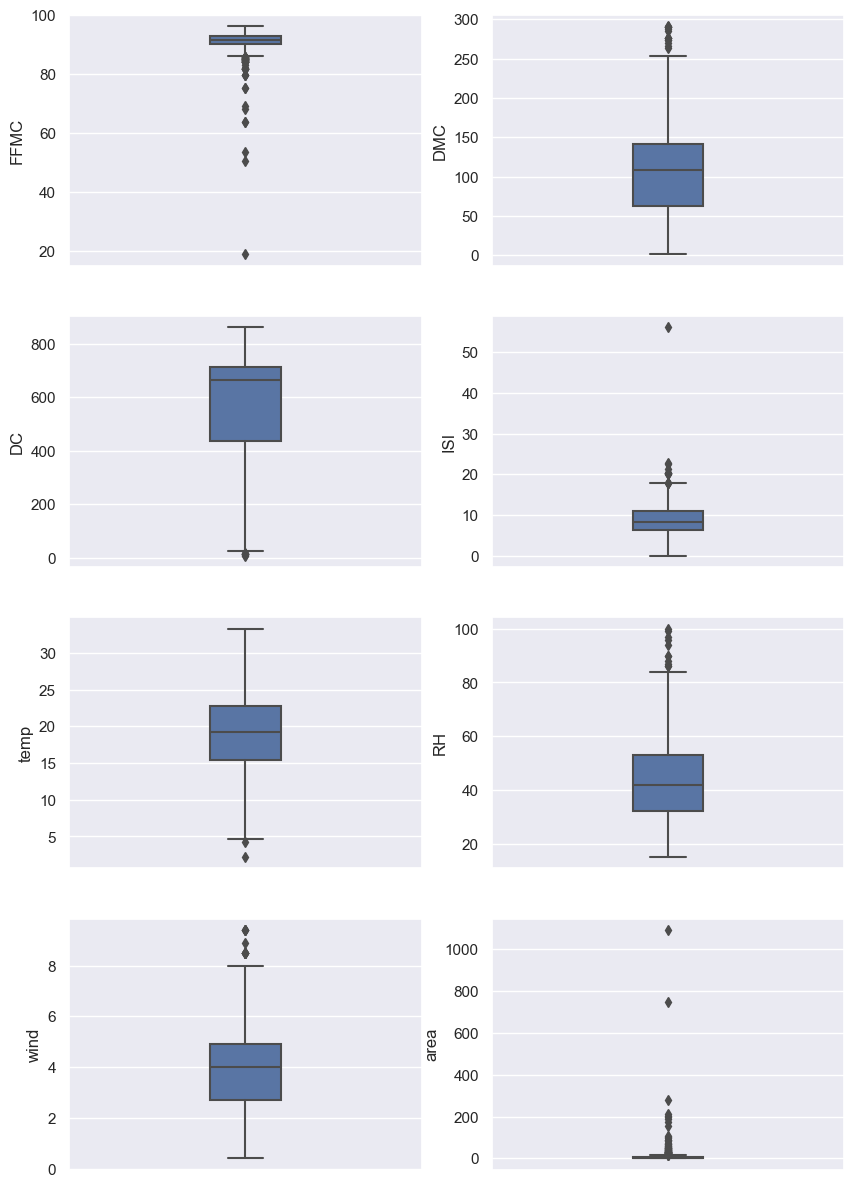

In [300]:
# Drawing boxplot for indepent variables with continuous values
cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.subplot(4,2,i)
    sns.boxplot(y=col, data=forest,width=0.2)
    i+=1
plt.show()

<h4>Observations:</h4>
1. DC has highest mean among the other continues independent variables<br>
2. wind has lowest mean<br>
3. as DC has high mean there is higb variance in the data points but having less numbers of outliers<br>
4. IQR range is very less in FFMC having more number's of outliers 

<Figure size 500x900 with 0 Axes>

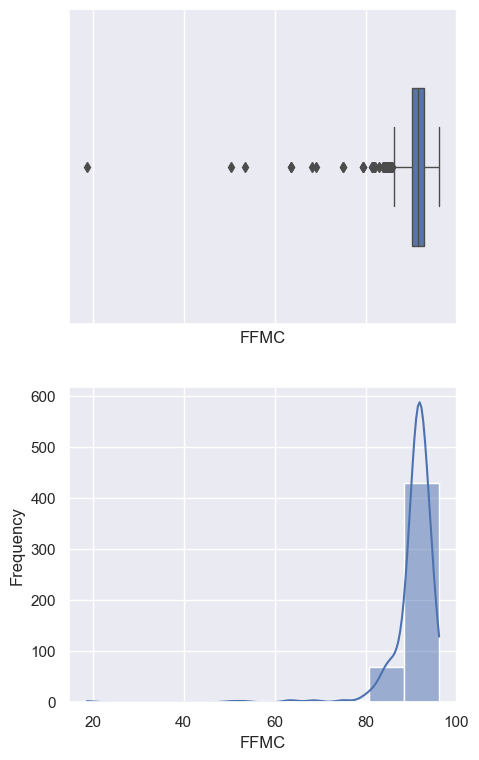

<Figure size 500x900 with 0 Axes>

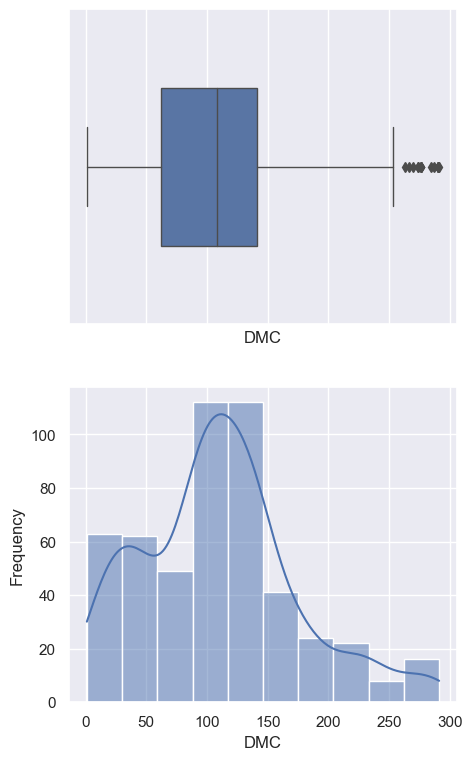

<Figure size 500x900 with 0 Axes>

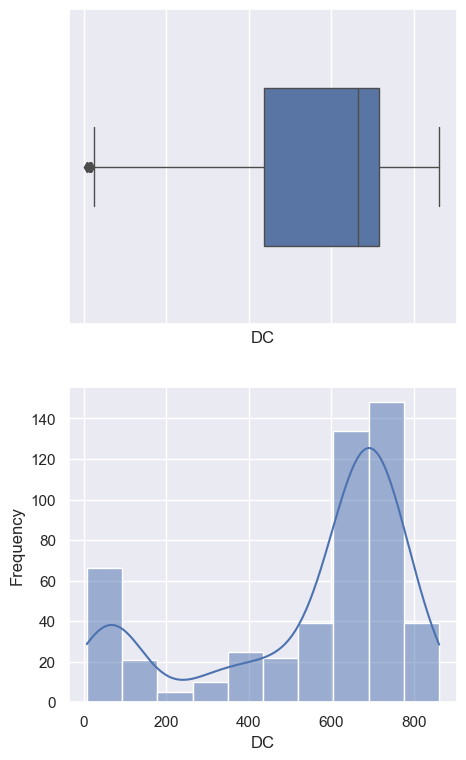

<Figure size 500x900 with 0 Axes>

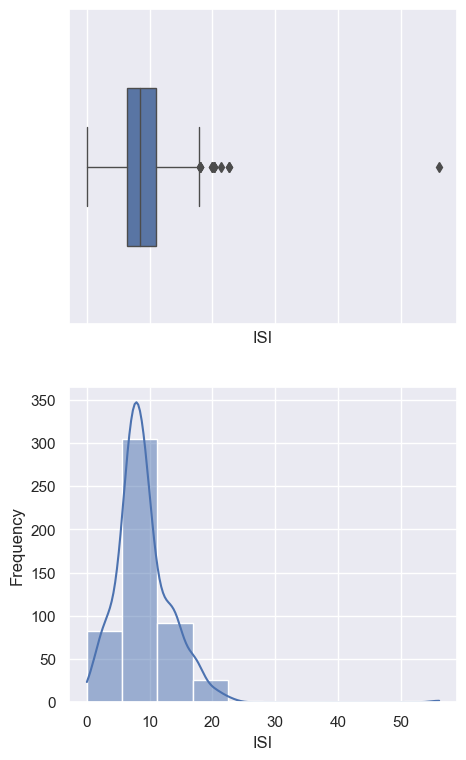

<Figure size 500x900 with 0 Axes>

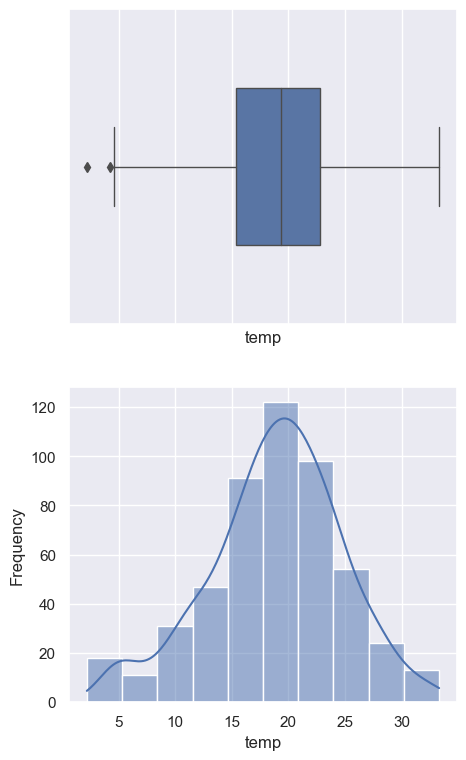

<Figure size 500x900 with 0 Axes>

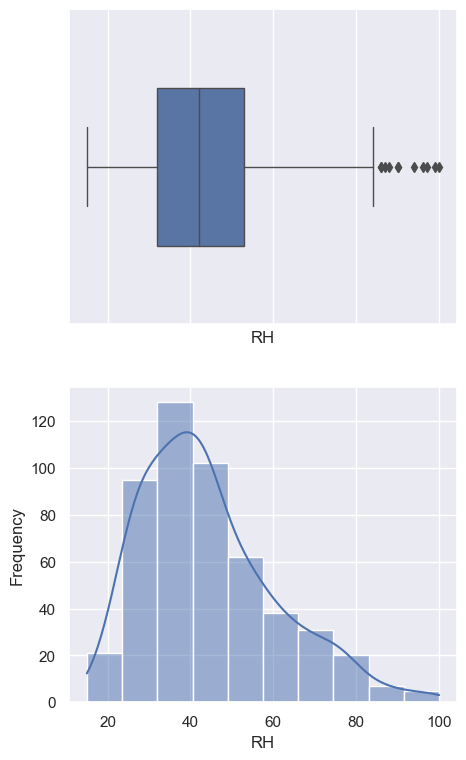

<Figure size 500x900 with 0 Axes>

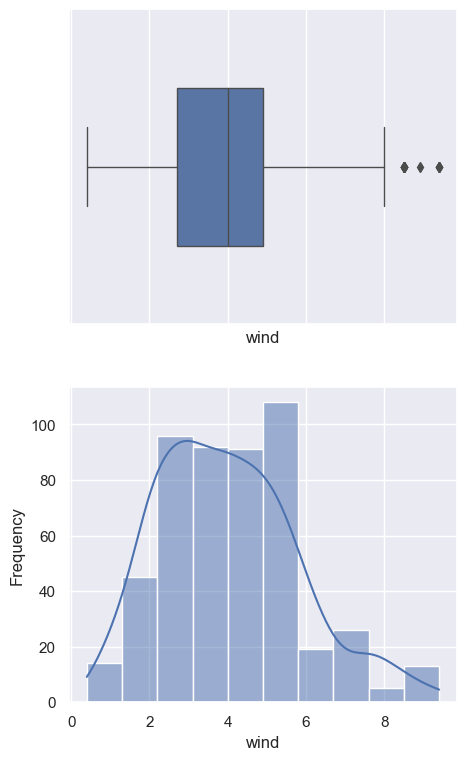

<Figure size 500x900 with 0 Axes>

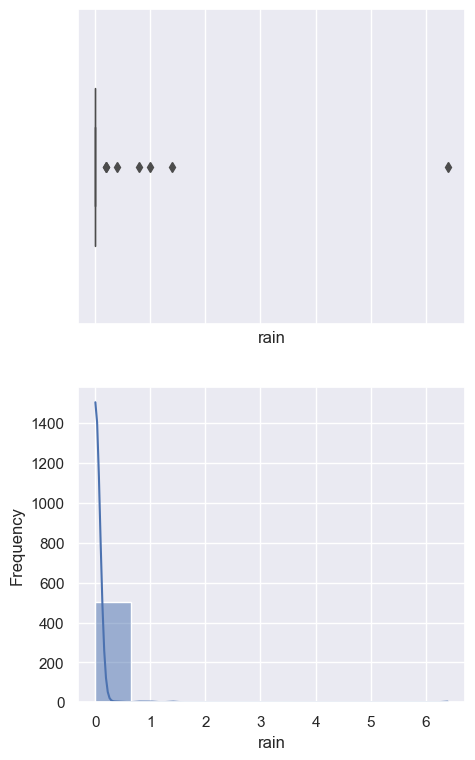

<Figure size 500x900 with 0 Axes>

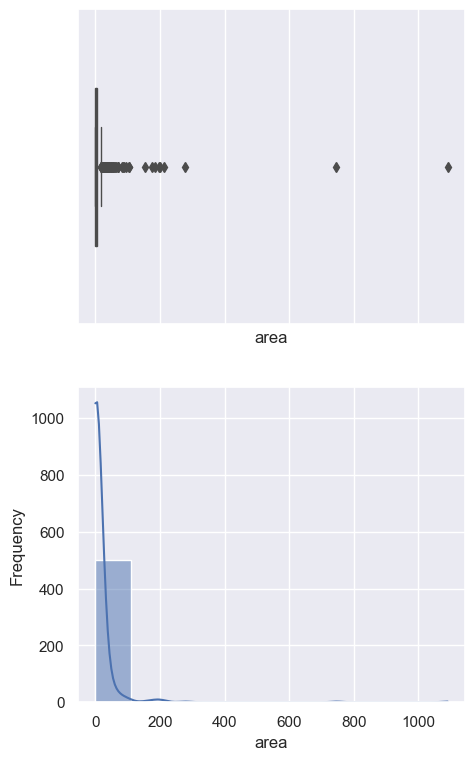

<Figure size 500x900 with 0 Axes>

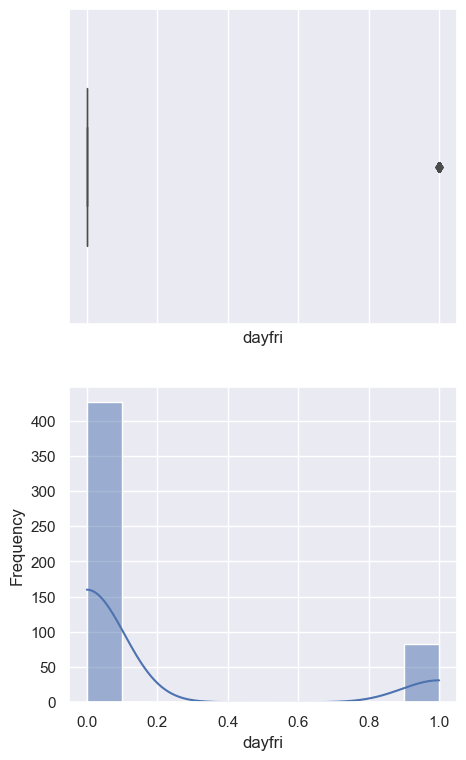

<Figure size 500x900 with 0 Axes>

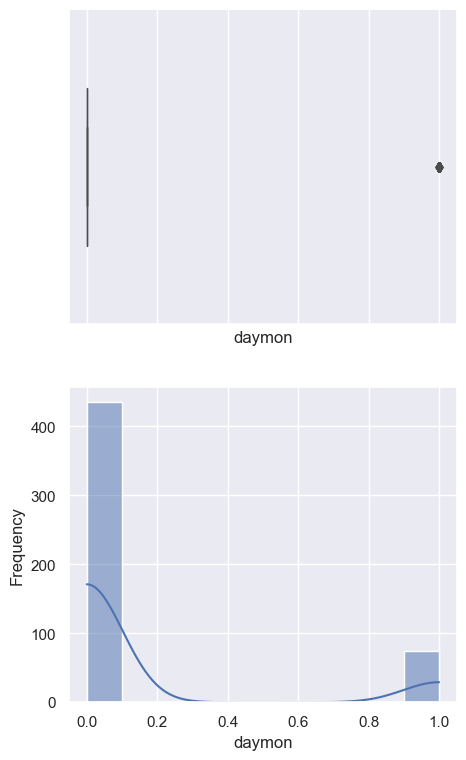

<Figure size 500x900 with 0 Axes>

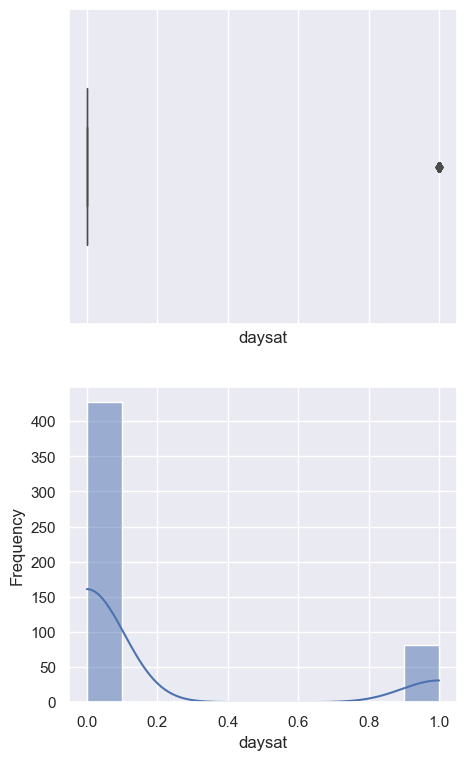

<Figure size 500x900 with 0 Axes>

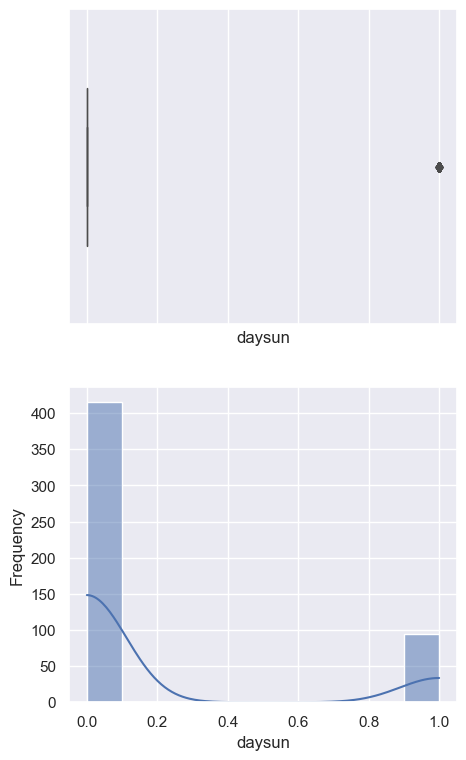

<Figure size 500x900 with 0 Axes>

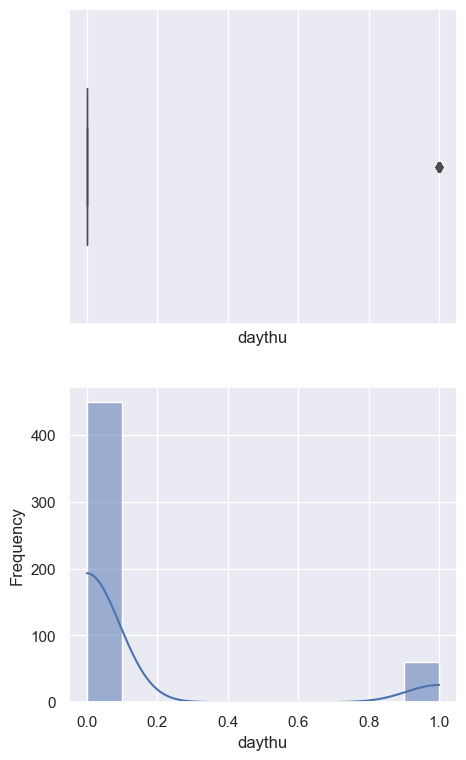

<Figure size 500x900 with 0 Axes>

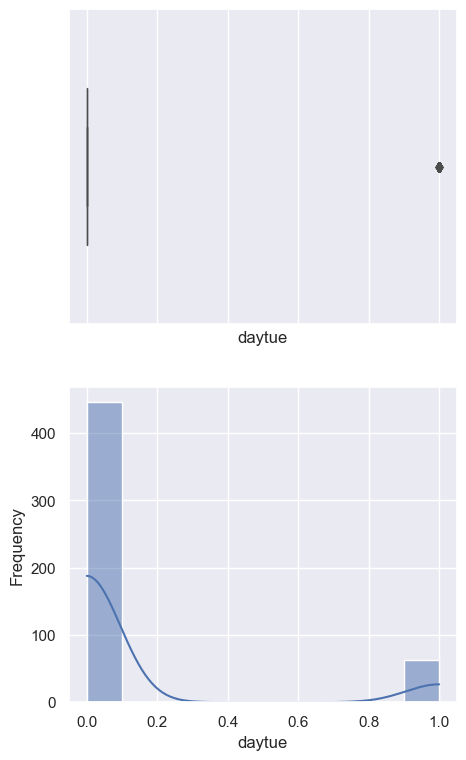

<Figure size 500x900 with 0 Axes>

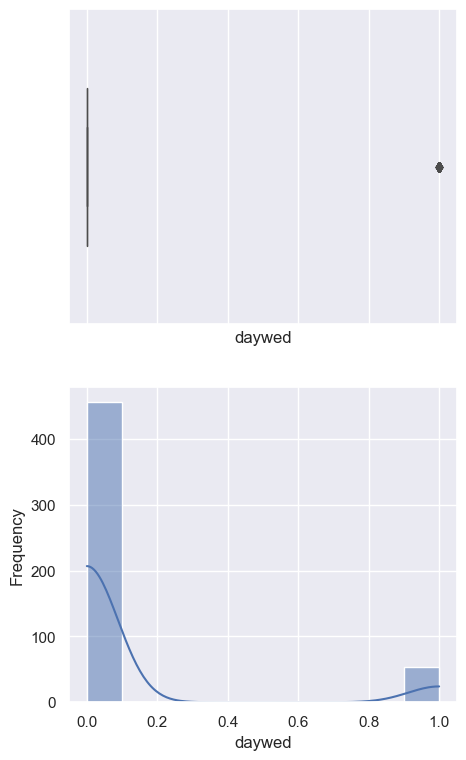

<Figure size 500x900 with 0 Axes>

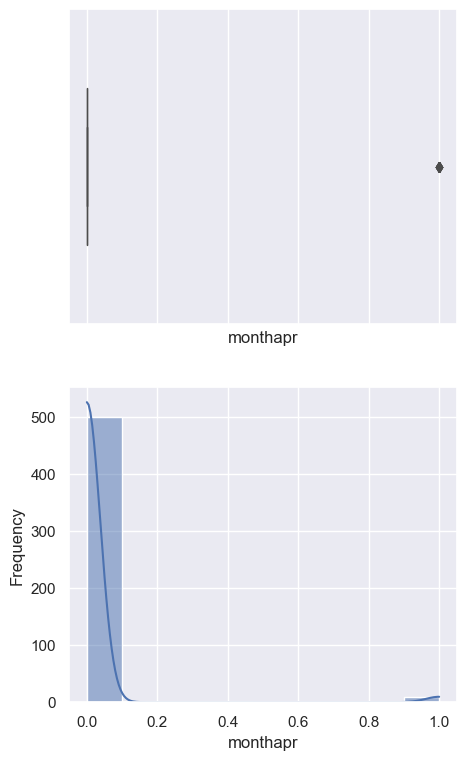

<Figure size 500x900 with 0 Axes>

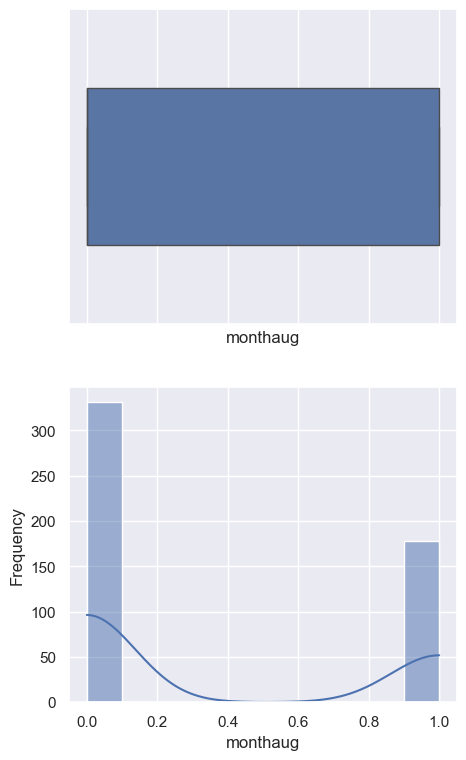

<Figure size 500x900 with 0 Axes>

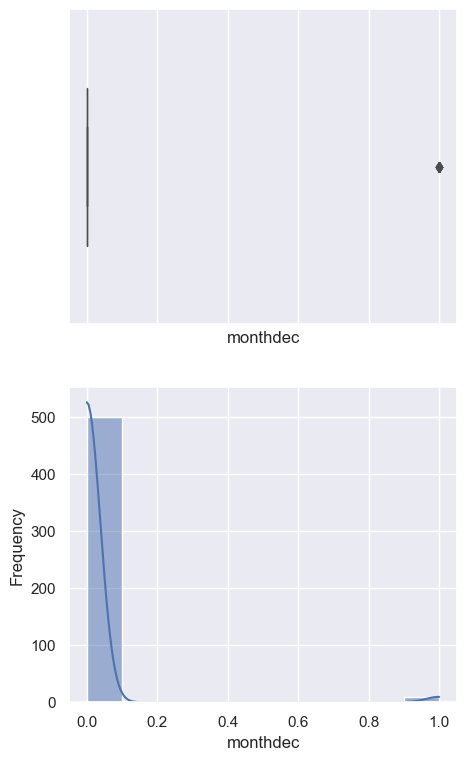

<Figure size 500x900 with 0 Axes>

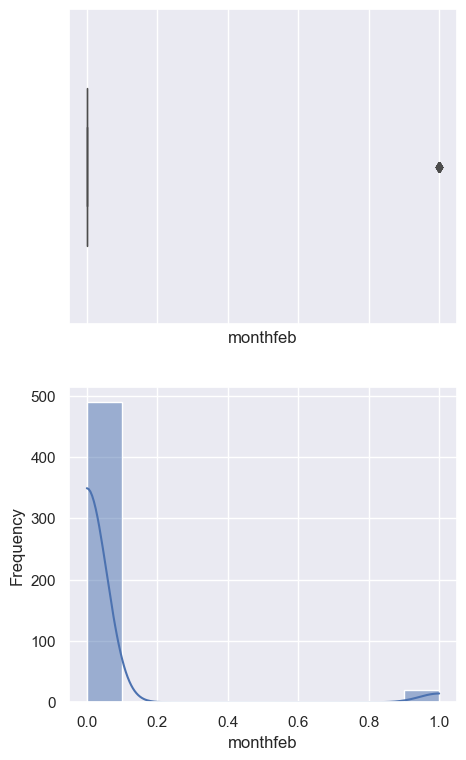

<Figure size 500x900 with 0 Axes>

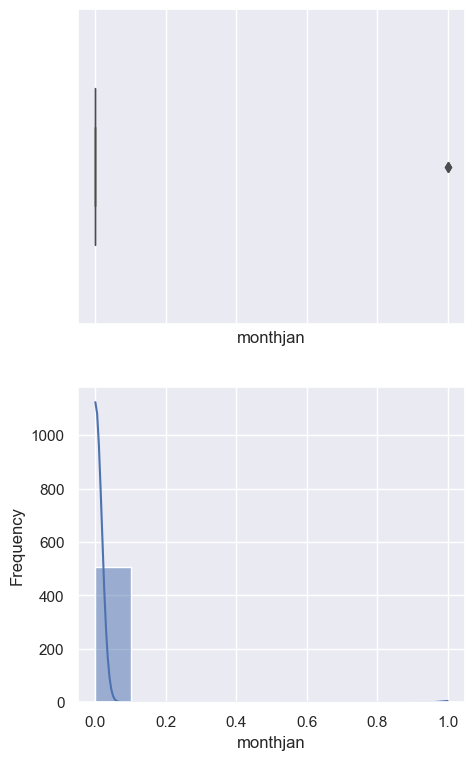

<Figure size 500x900 with 0 Axes>

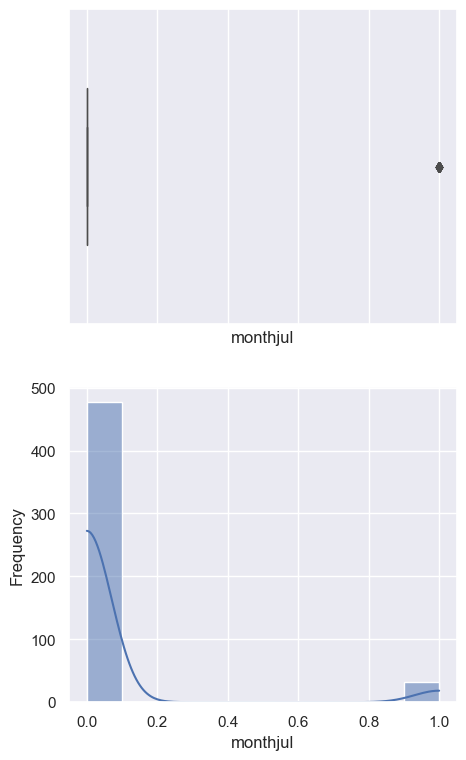

<Figure size 500x900 with 0 Axes>

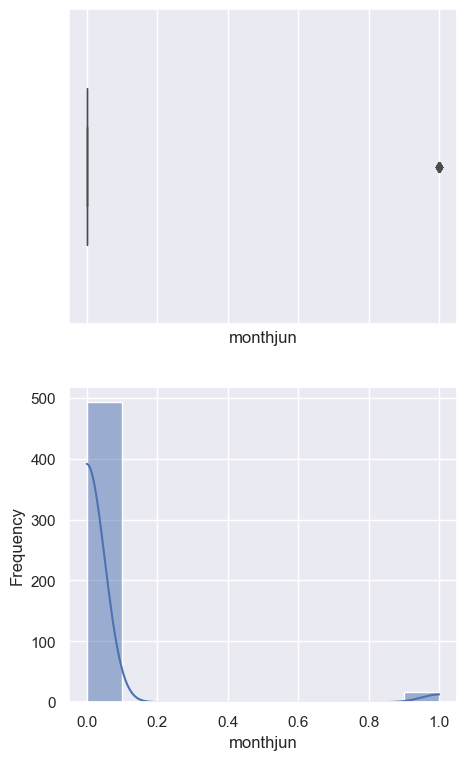

<Figure size 500x900 with 0 Axes>

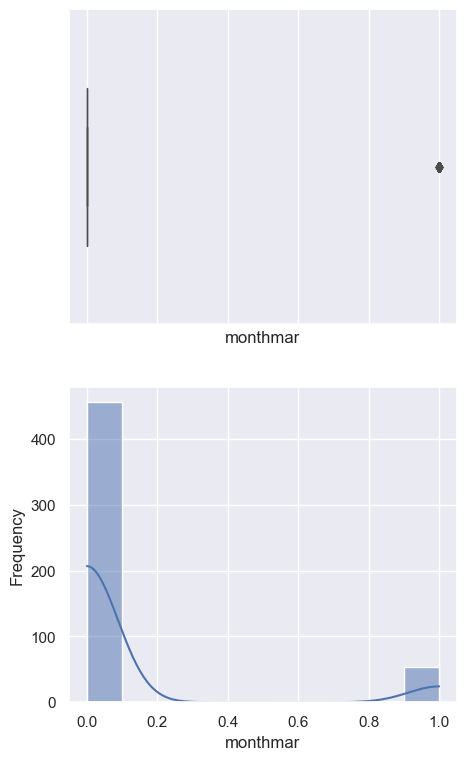

<Figure size 500x900 with 0 Axes>

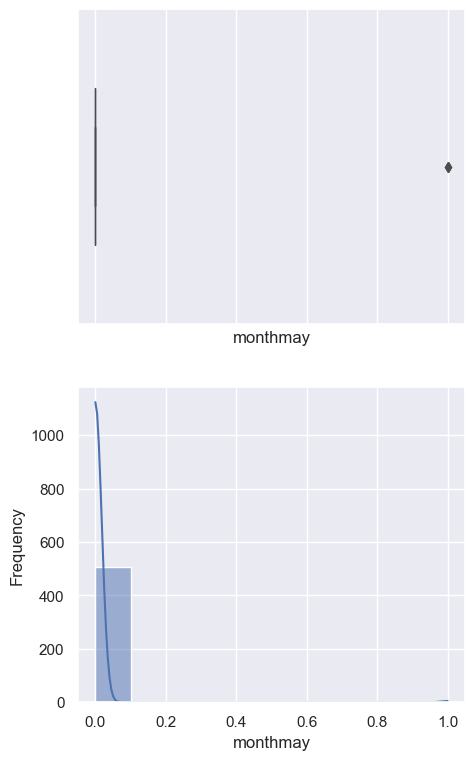

<Figure size 500x900 with 0 Axes>

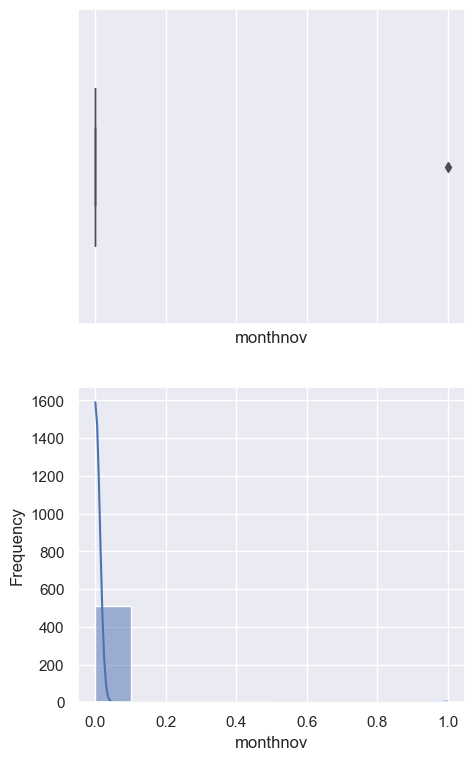

<Figure size 500x900 with 0 Axes>

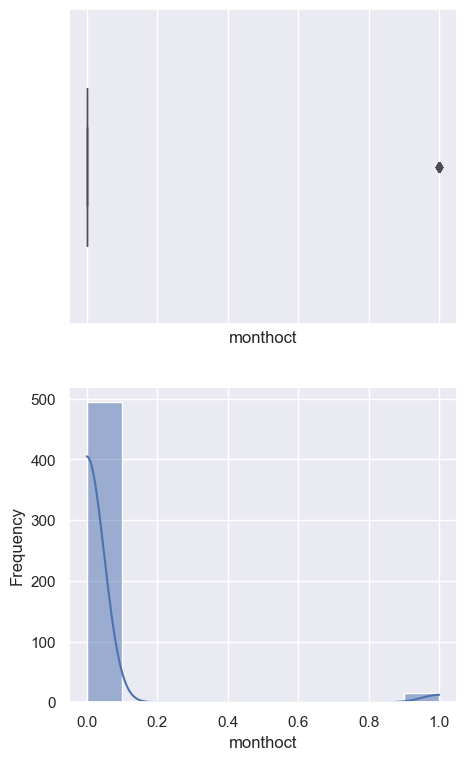

<Figure size 500x900 with 0 Axes>

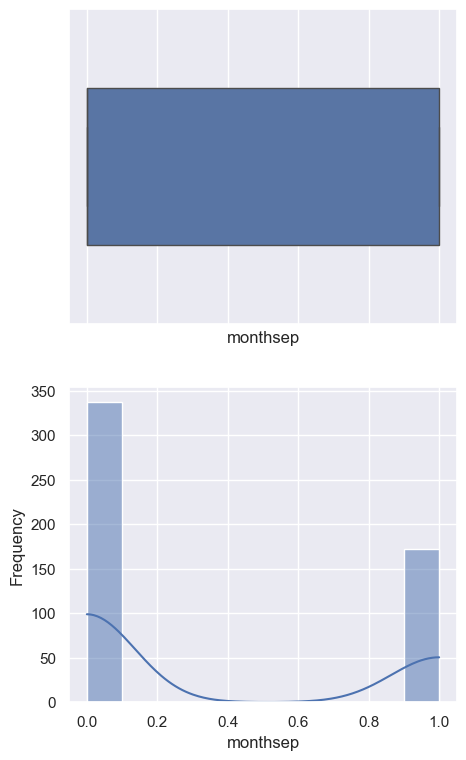

<Figure size 500x900 with 0 Axes>

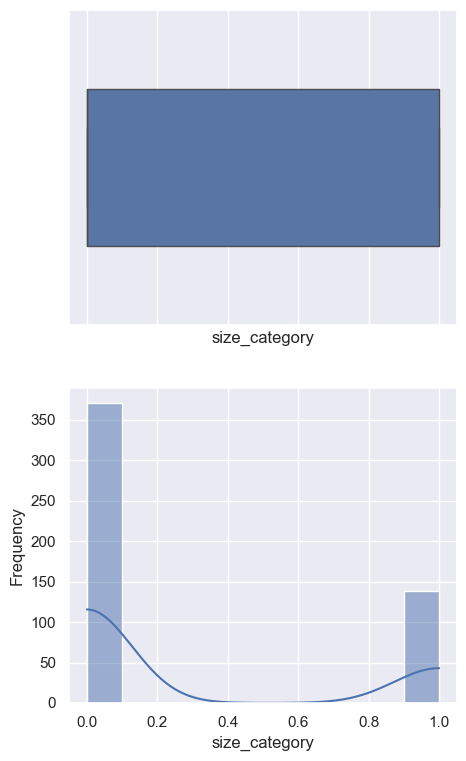

In [301]:
#detecting outliers 
# a for loop to automate our task
for i in forest.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(5,9)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(forest[i], ax=ax_box , linewidth= 1.0,width=0.5)
    sns.histplot(forest[i], ax=ax_hist , bins = 10,kde=True)

<h4>Observations:</h4>
1. the feature Temperature has `Normal distribution` means its mean,mode and median will be same<br>
2. DMC and RH has `postitive skewness` where mean is greater than median,and median is greater than mode<br>
3. DC and FFMC has `negative skewness` where mean is lower than median and mean

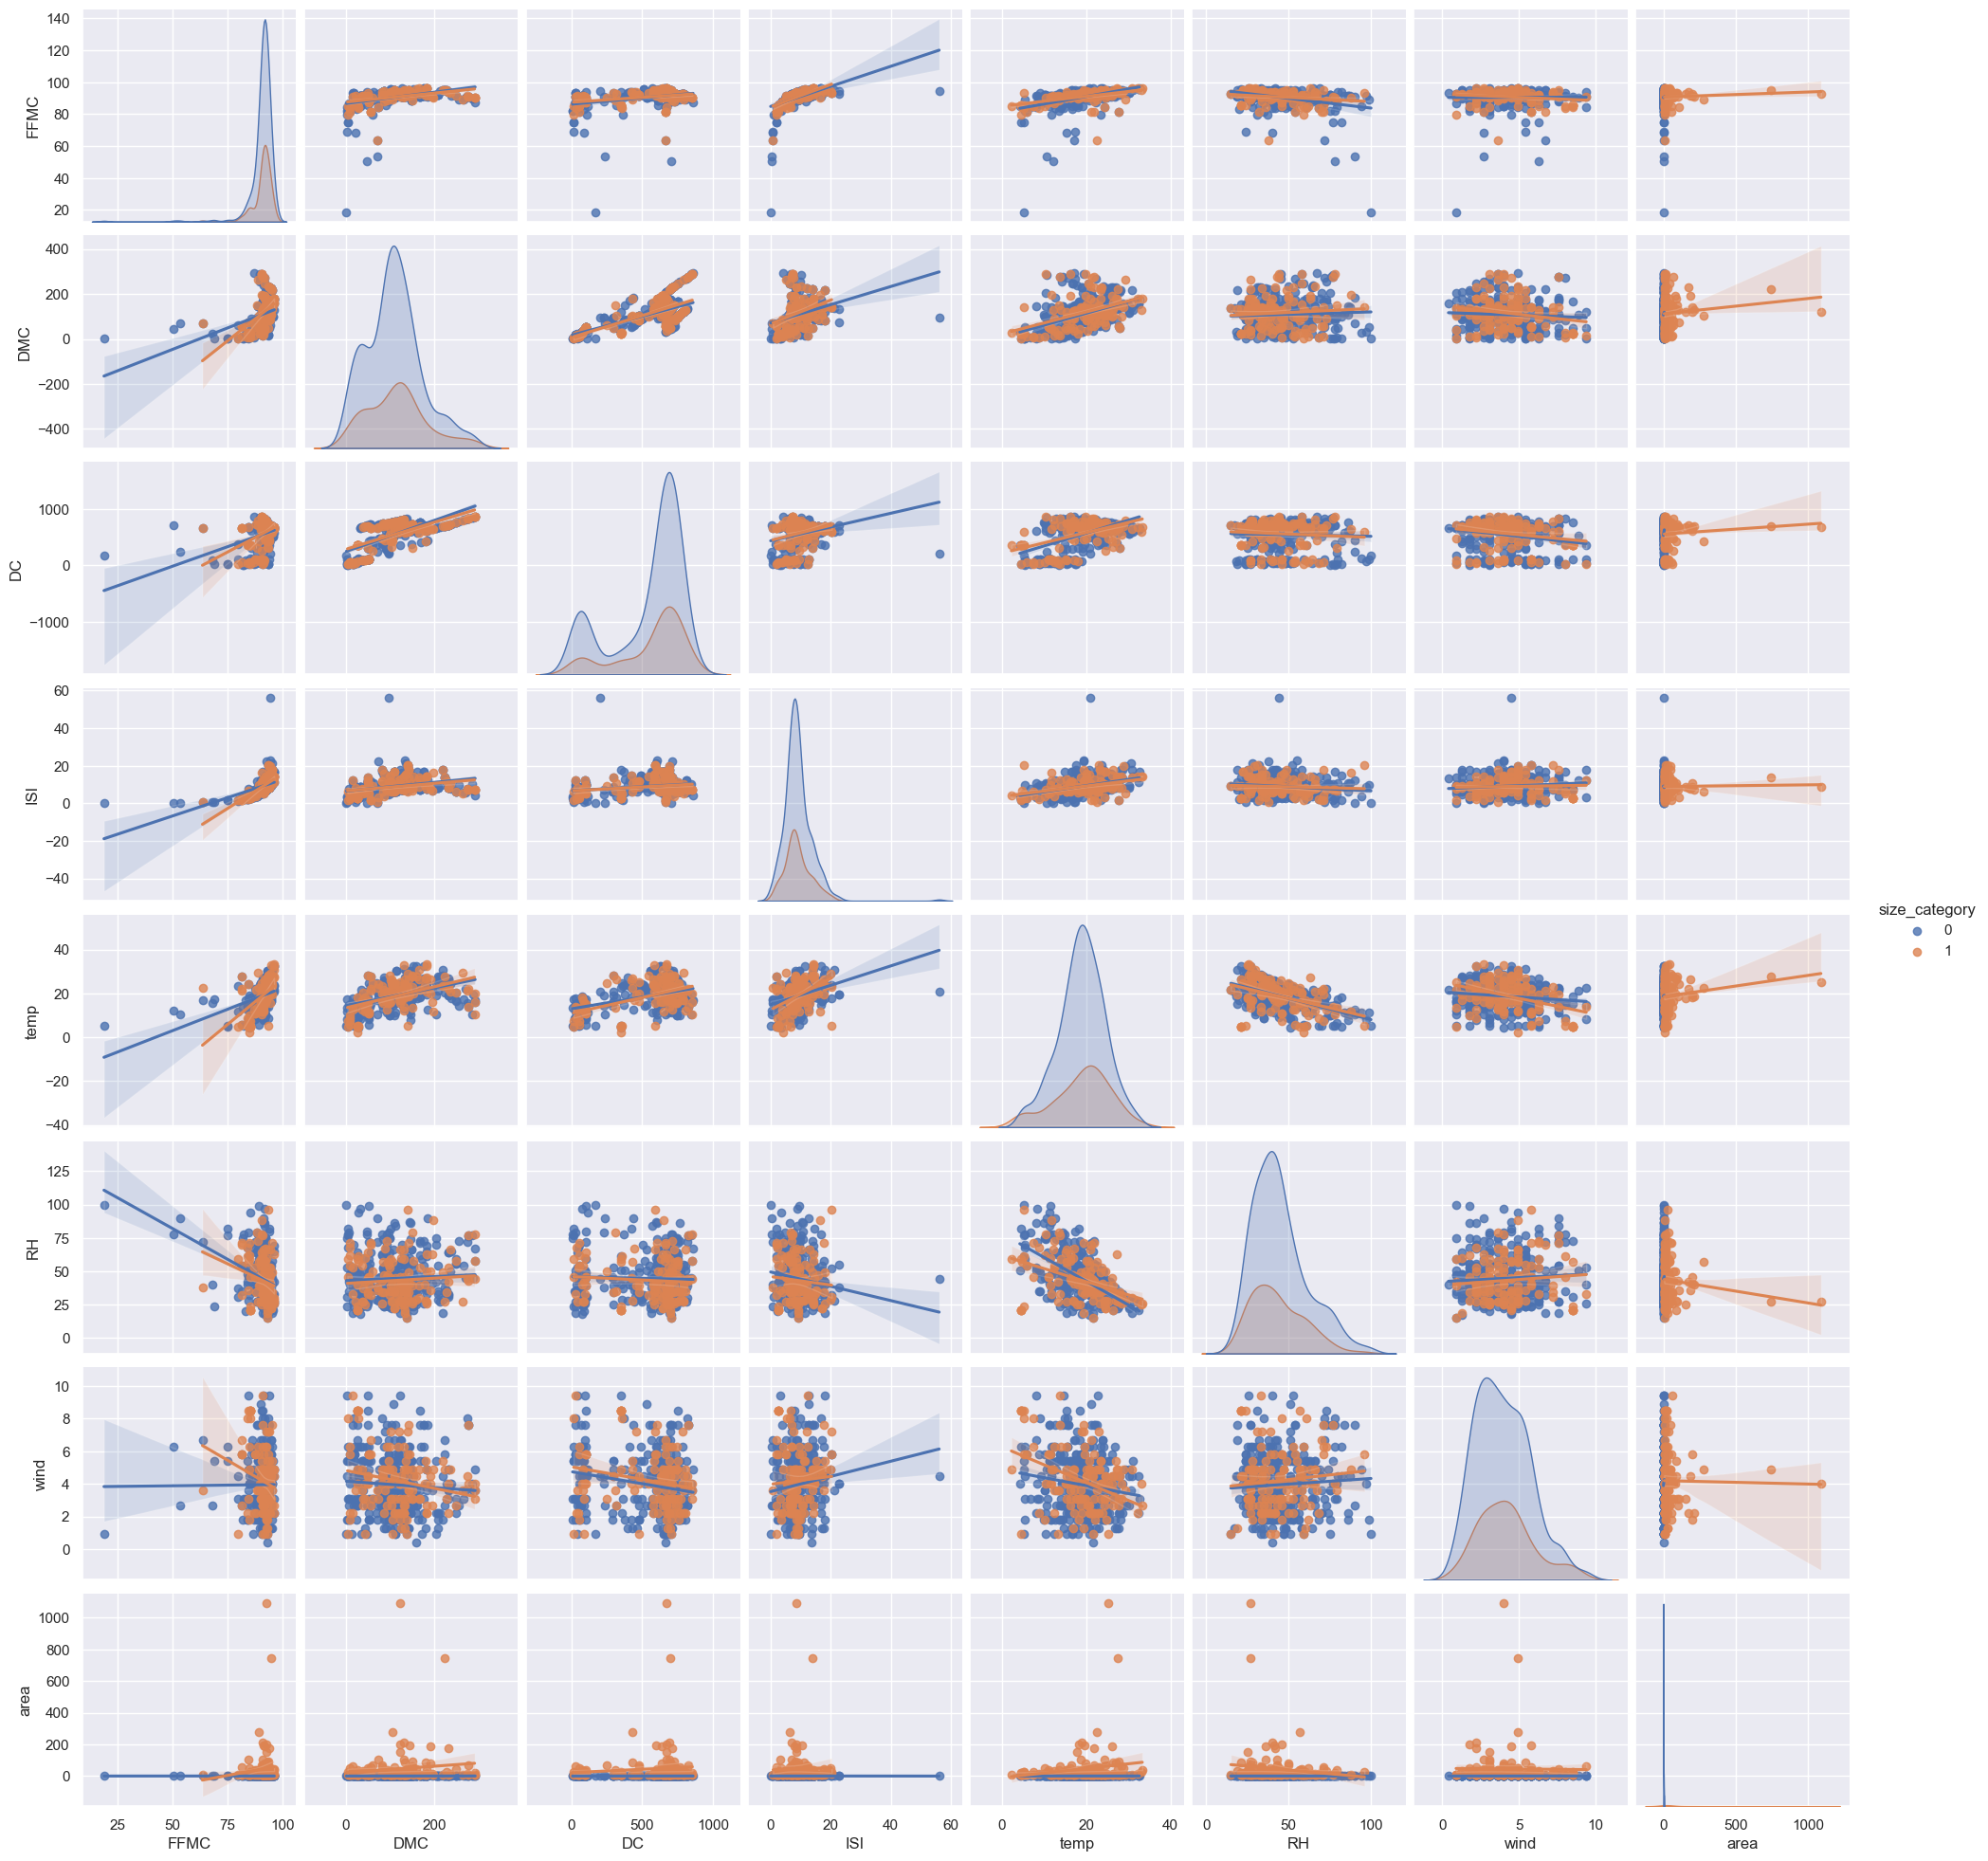

In [302]:
#displaying pairplot to check relationship
sns.pairplot(forest,x_vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area'],
             y_vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area'],hue='size_category',
             kind='reg',diag_kind='kde')
plt.show()

<h4>Observations:</h4>
1. Temperature and relative humidity has high collinearity with dependent varible('size_category')<br>
2. deep moist convection (DMC) and temp have relation with each other<br>
3. Most of the independent varibles are skewed to with respect to each others


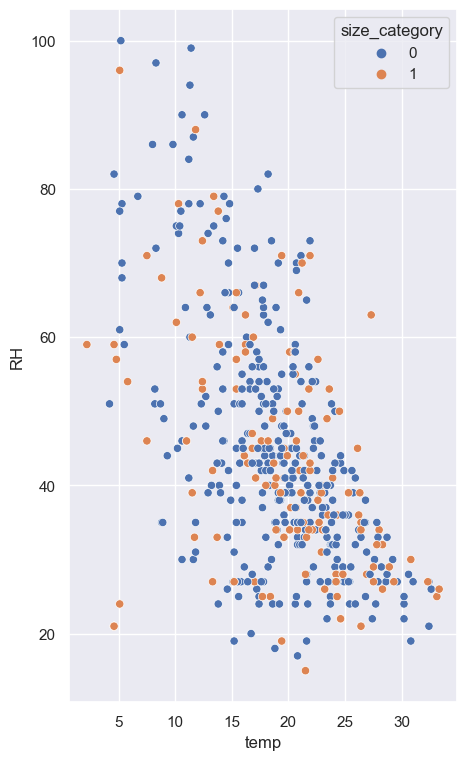

In [303]:
sns.scatterplot(x='temp',y='RH',data=forest,hue='size_category')
plt.show()

<h4>Observations:</h4>
1. The RH and temp having negative relation
2. we can see that temperature is incresing the  relative humidity getting drcresing
3. which leds to less number of fires took place

In [304]:
fig = px.scatter(forest, x="temp", y="DMC", color='size_category')
fig.show()

<h4>Observations:</h4>
1. The DMC and temp having postive relation
2. we can see that temperature is incresing the  DMC also getting incresing

In [305]:
# importing the modules
from bokeh.palettes import magma
from bokeh.plotting import figure, output_file, show

# file to save the model
output_file("output.html")

# instantiating the figure object
graph = figure(title = "Scatter Plot")

# name of the x-axis
graph.xaxis.axis_label = "Temperature"

# name of the y-axis
graph.yaxis.axis_label = "DC"


# color value of the scatter points
color = magma(256)

x=forest['temp']
y=forest['DC']
graph.scatter(x, y,color = color)

show(graph)


<img src='bokeh_plot.png'/>

In [306]:
cor = forest.corr()
cor

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444,0.024292
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779,0.046598
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299,0.028372
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600,-0.007867
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428,0.009976
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631,-0.039730
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211,0.059513
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319,0.053463
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191,0.310561
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903,-0.017980


<h4>corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.</h4>

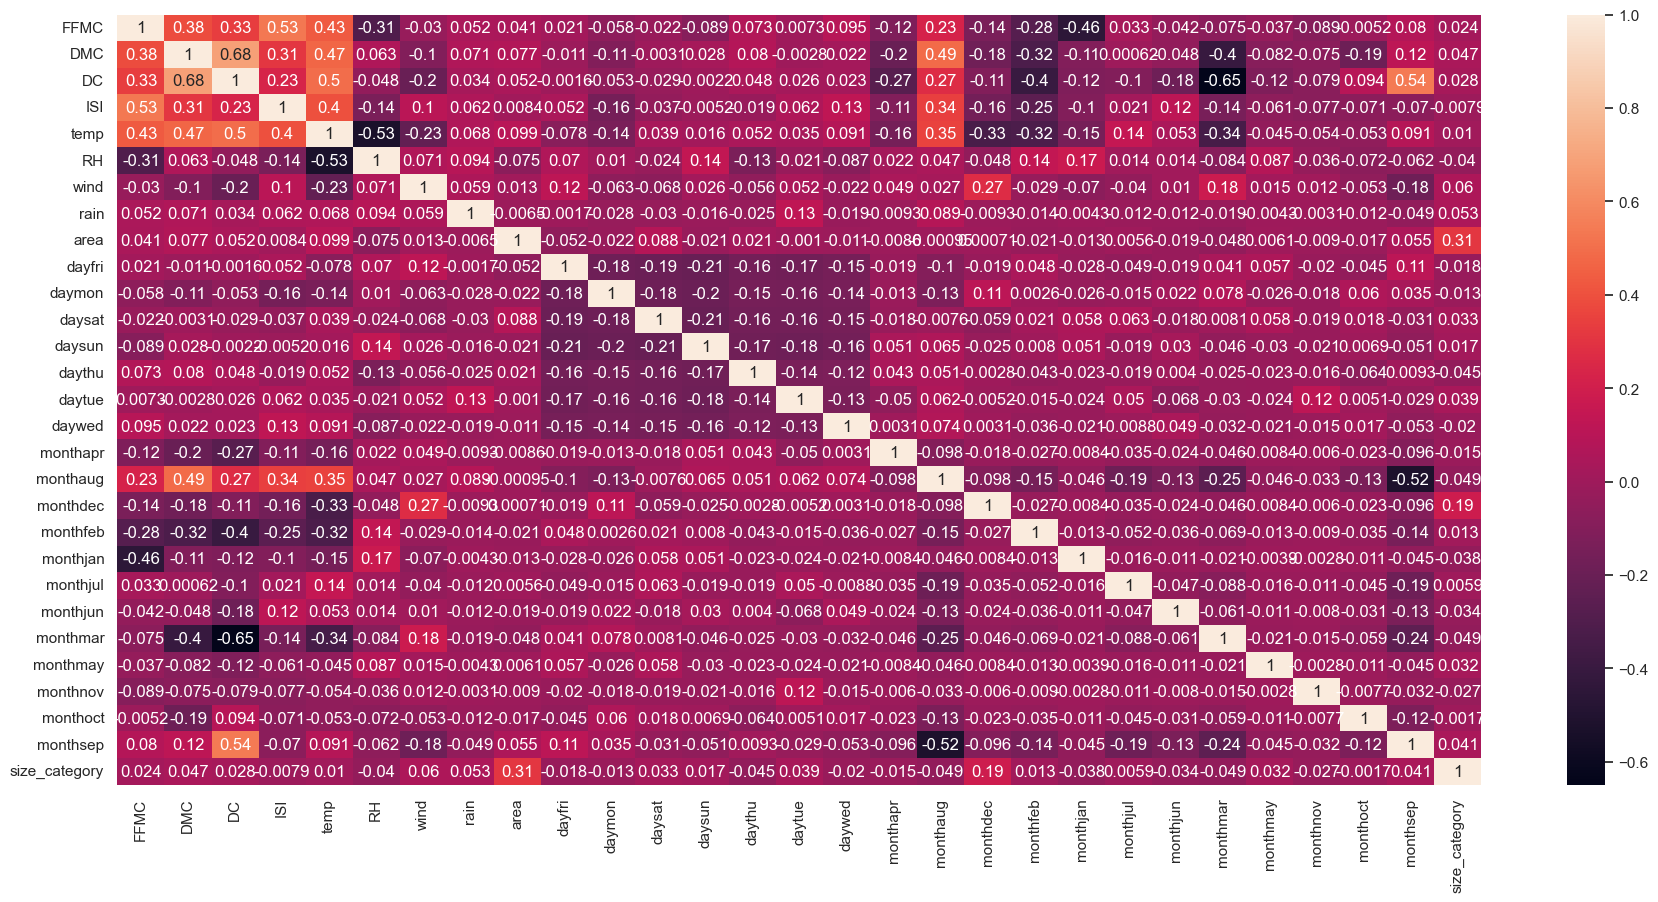

In [307]:
#checking corelation 
plt.figure(figsize=(22,10))
sns.heatmap(cor, annot=True,)
plt.show()

## Feature Engineering

### Univariate Feature Selection

In [308]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [309]:
array = forest.values
X = array[:,0:28]
Y = array[:,28]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

In [310]:
X

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [311]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [312]:
# summarize scores
set_printoptions(precision=3)    #For regression: f_regression, mutual_info_regression
print(fit.scores_)               #For classification: chi2, f_classif, mutual_info_classif
features = fit.transform(X)                             


[1.021e-01 4.073e+01 4.599e+01 7.324e-02 9.143e-02 4.853e+00 1.455e+00
 6.237e+00 1.551e+04 1.377e-01 7.725e-02 4.729e-01 1.235e-01 9.003e-01
 6.846e-01 1.790e-01 1.089e-01 7.864e-01 1.738e+01 8.441e-02 7.439e-01
 1.662e-02 5.661e-01 1.084e+00 5.302e-01 3.720e-01 1.505e-03 5.612e-01]


### Recursive Feature Elimination

In [313]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [314]:
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

In [315]:
# Feature Ranking:
fit.ranking_

array([10, 21, 23,  8, 16, 17, 14, 24,  1,  5, 15,  1,  2,  3,  4, 12, 19,
       18,  7,  9, 22,  1, 20, 13, 26, 25, 11,  6])

### Feature Importance using Decision Tree

In [316]:
# Feature Importance with Extra Trees Classifier
from sklearn.tree import  DecisionTreeClassifier

In [317]:
# feature extraction
model = DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

In [318]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


<h3>By feature engineering we have got the features which are more important and less important.so, we will drop the features which are less important </h3>

In [319]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [320]:
forest.pop('area')
forest.pop('daysat')
forest.pop('daysun')
forest.pop('daythu')
forest.pop('monthjul')

0      0
1      0
2      0
3      0
4      0
      ..
512    0
513    0
514    0
515    0
516    0
Name: monthjul, Length: 509, dtype: int64

In [321]:
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Building SVM Models 

In [322]:
# SVM Classification
#importing libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

#### SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.

In [323]:
ms=StandardScaler()
X=pd.DataFrame(ms.fit_transform(X))

In [324]:
X

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,2.265509,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,2.265509,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
505,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
506,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
507,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413


In [325]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=100)

In [376]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((356, 28), (356,), (153, 28), (153,))

### SVM With GridSearch

In [377]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[4,8,12,16,20],'C':[12,14,0.01,10,20,17,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [12, 14, 0.01, 10, 20, 17, 0.001],
                          'gamma': [4, 8, 12, 16, 20], 'kernel': ['rbf']}])

#### GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

In [378]:
gsv.best_params_ , gsv.best_score_ 

({'C': 12, 'gamma': 12, 'kernel': 'rbf'}, 0.747261345852895)

In [401]:
clf = SVC(C= 12, gamma = 12)
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 70.58823529411765


array([[106,   1],
       [ 44,   2]], dtype=int64)

In [402]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.99      0.82       107
         1.0       0.67      0.04      0.08        46

    accuracy                           0.71       153
   macro avg       0.69      0.52      0.45       153
weighted avg       0.69      0.71      0.60       153



In [403]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7059


### Buliding SVM model with Linear Kernel

In [382]:
clf1 = SVC()
param_grid = [{'kernel':['linear'],'gamma':[4,8,12,16,20],'C':[12,14,0.1,0.01,10,20,17,0.001] }]
gsv = GridSearchCV(clf1,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [12, 14, 0.1, 0.01, 10, 20, 17, 0.001],
                          'gamma': [4, 8, 12, 16, 20], 'kernel': ['linear']}])

In [383]:
gsv.best_params_ , gsv.best_score_ 

({'C': 20, 'gamma': 4, 'kernel': 'linear'}, 0.9577464788732394)

In [387]:
clf1 = SVC(C= 20, gamma = 4,kernel='linear')
clf1.fit(X_train , y_train)

y_pred = clf1.predict(X_test)

acc1 = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc1)
confusion_matrix(y_test, y_pred)

Accuracy = 97.38562091503267


array([[105,   2],
       [  2,  44]], dtype=int64)

In [388]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       107
         1.0       0.96      0.96      0.96        46

    accuracy                           0.97       153
   macro avg       0.97      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153



In [389]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf1.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf1.score(X_test, y_test)))

Training set score: 0.9860
Test set score: 0.9739


### Buliding SVM model with Polynomial Kernel

In [390]:
clf2 = SVC()
param_grid = [{'kernel':['poly'],'gamma':[4,8,12,16,20],'C':[12,14,0.1,0.01,10,20,17,0.001]}]
gsv = GridSearchCV(clf2,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [12, 14, 0.1, 0.01, 10, 20, 17, 0.001],
                          'gamma': [4, 8, 12, 16, 20], 'kernel': ['poly']}])

In [391]:
gsv.best_params_ , gsv.best_score_ 

({'C': 12, 'gamma': 4, 'kernel': 'poly'}, 0.7699139280125196)

In [392]:
clf2 = SVC(C= 12, gamma = 4,kernel='poly')
clf2.fit(X_train , y_train)

y_pred = clf2.predict(X_test)

acc2 = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc2)
confusion_matrix(y_test, y_pred)

Accuracy = 71.24183006535948


array([[87, 20],
       [24, 22]], dtype=int64)

In [393]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80       107
         1.0       0.52      0.48      0.50        46

    accuracy                           0.71       153
   macro avg       0.65      0.65      0.65       153
weighted avg       0.71      0.71      0.71       153



In [394]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf2.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7124


### Buliding SVM model with Sigmoid Kernel

In [395]:
clf3 = SVC()
param_grid = [{'kernel':['sigmoid'],'gamma':[8,12,16,20],'C':[12,14,0.1,10,20,17,0.001] }]
gsv = GridSearchCV(clf3,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [12, 14, 0.1, 10, 20, 17, 0.001],
                          'gamma': [8, 12, 16, 20], 'kernel': ['sigmoid']}])

In [396]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.001, 'gamma': 8, 'kernel': 'sigmoid'}, 0.7415873015873016)

In [397]:
clf3 = SVC(C= 0.001, gamma = 8,kernel='sigmoid')
clf3.fit(X_train , y_train)

y_pred = clf3.predict(X_test)

acc3 = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc3)
confusion_matrix(y_test, y_pred)

Accuracy = 69.93464052287581


array([[107,   0],
       [ 46,   0]], dtype=int64)

In [398]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       107
         1.0       0.00      0.00      0.00        46

    accuracy                           0.70       153
   macro avg       0.35      0.50      0.41       153
weighted avg       0.49      0.70      0.58       153



In [399]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf3.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf3.score(X_test, y_test)))

Training set score: 0.7416
Test set score: 0.6993


In [400]:
data = {"MODEL":pd.Series(["Model_RBF","Model_Linear","Model_Poly","Model_Sigmoid"]),"Accuracy":pd.Series([acc,acc1,acc2,acc3])}
acc_table=pd.DataFrame(data)
acc_table.sort_values(['Accuracy'])

,MODEL,Accuracy
0,Model_RBF,69.934641
3,Model_Sigmoid,69.934641
2,Model_Poly,71.241830
1,Model_Linear,97.385621


<h4>Insights:</h4>
1. we have Classify the Size_Categorie using SVM model<br>
2. we have build four SVM models using different kernels<br>
3. by using rbf kernel  test accuracy is getting 74% <br>
4. by using linear kernel  test accuracy is getting 97%<br>
5. by using poly kernel  test accuracy is getting 81%<br>
6. by using sigmoid kernel  test accuracy is getting 74%<br>
7. so we can use model which is giving us testing accuracy 97% accuracy<br>
8. Model_Linear has training accuracy higher than testing accuracy so there is no any overfitting and underfitting<br>
9. so we will use model which has kernel Linear for Classifying the Size_Categorie. 